## Table of Contents
1. Dataset Overview
2. Data Cleaning
3. Exploratory Visualizations
4. Top Players
5. Radar Charts
6. Player Clustering


In [1]:
# ⚽ Exploratory Data Analysis: FIFA 21 Player Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Set up visualization style
sns.set(style='whitegrid')

# Load dataset
df = pd.read_csv("D:/Data Science Projects/Player Performance Prediction/data/processed/players_21_cleaned.csv")
print("Dataset shape:", df.shape)

Dataset shape: (18944, 58)


In [14]:
# Dataset Overview
print("\n--- Head ---")
print(df.head())
print("\n--- Info ---")
print(df.info())
print("\n--- Summary Statistics ---")
print(df.describe().T)


--- Head ---
   Unnamed: 0         short_name  age  height_cm  weight_kg nationality  \
0           0           L. Messi   33        170         72   Argentina   
1           1  Cristiano Ronaldo   35        187         83    Portugal   
2           2           J. Oblak   27        188         87    Slovenia   
3           3     R. Lewandowski   31        184         80      Poland   
4           4          Neymar Jr   28        175         68      Brazil   

             club_name             league_name  league_rank  overall  ...  \
0         FC Barcelona  Spain Primera Division          1.0       93  ...   
1             Juventus         Italian Serie A          1.0       92  ...   
2      Atlético Madrid  Spain Primera Division          1.0       91  ...   
3    FC Bayern München    German 1. Bundesliga          1.0       91  ...   
4  Paris Saint-Germain          French Ligue 1          1.0       91  ...   

   mentality_penalties  mentality_composure  defending_standing_tackle  

In [5]:
# Check for missing values
print("\n--- Missing Values ---")
print(df.isnull().sum().sort_values(ascending=False).head())


--- Missing Values ---
Unnamed: 0    0
short_name    0
age           0
height_cm     0
weight_kg     0
dtype: int64


In [6]:
# Check for duplicates
print("\n--- Duplicate Rows ---")
print(df.duplicated().sum())


--- Duplicate Rows ---
0


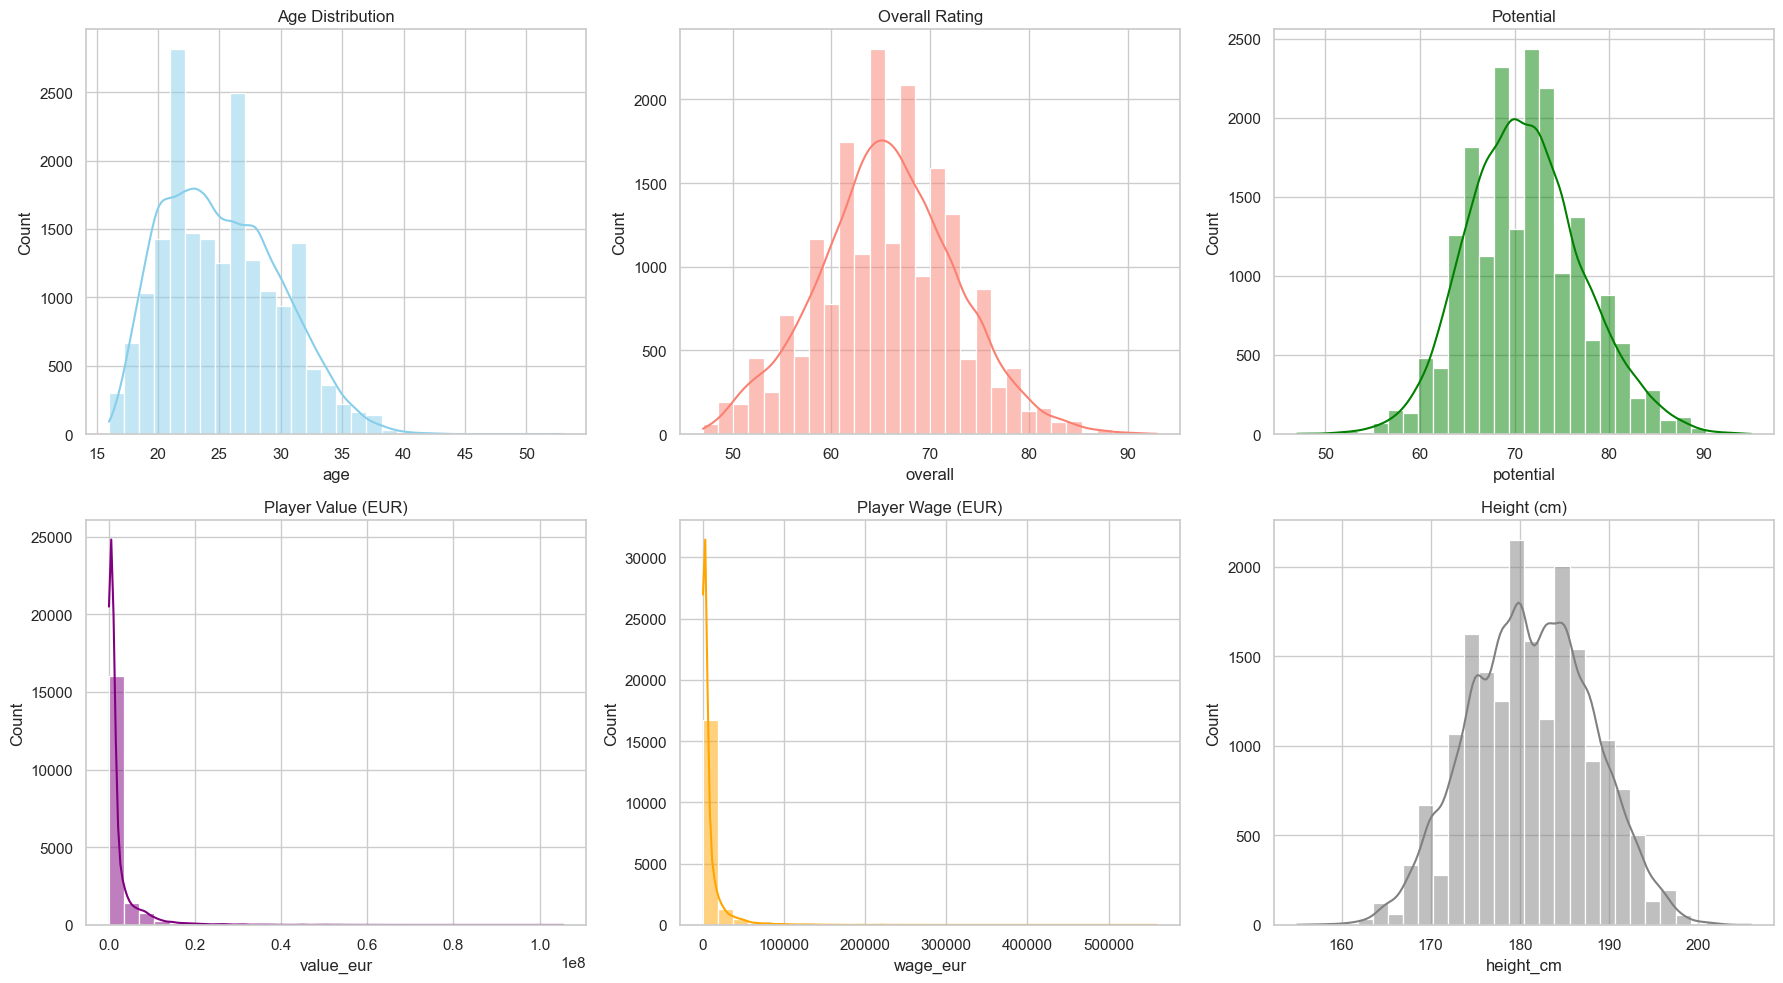

In [7]:
# Plot distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.histplot(df['age'], bins=30, kde=True, ax=axes[0,0], color='skyblue').set(title='Age Distribution')
sns.histplot(df['overall'], bins=30, kde=True, ax=axes[0,1], color='salmon').set(title='Overall Rating')
sns.histplot(df['potential'], bins=30, kde=True, ax=axes[0,2], color='green').set(title='Potential')
sns.histplot(df['value_eur'], bins=30, kde=True, ax=axes[1,0], color='purple').set(title='Player Value (EUR)')
sns.histplot(df['wage_eur'], bins=30, kde=True, ax=axes[1,1], color='orange').set(title='Player Wage (EUR)')
sns.histplot(df['height_cm'], bins=30, kde=True, ax=axes[1,2], color='gray').set(title='Height (cm)')
plt.tight_layout()
plt.show()

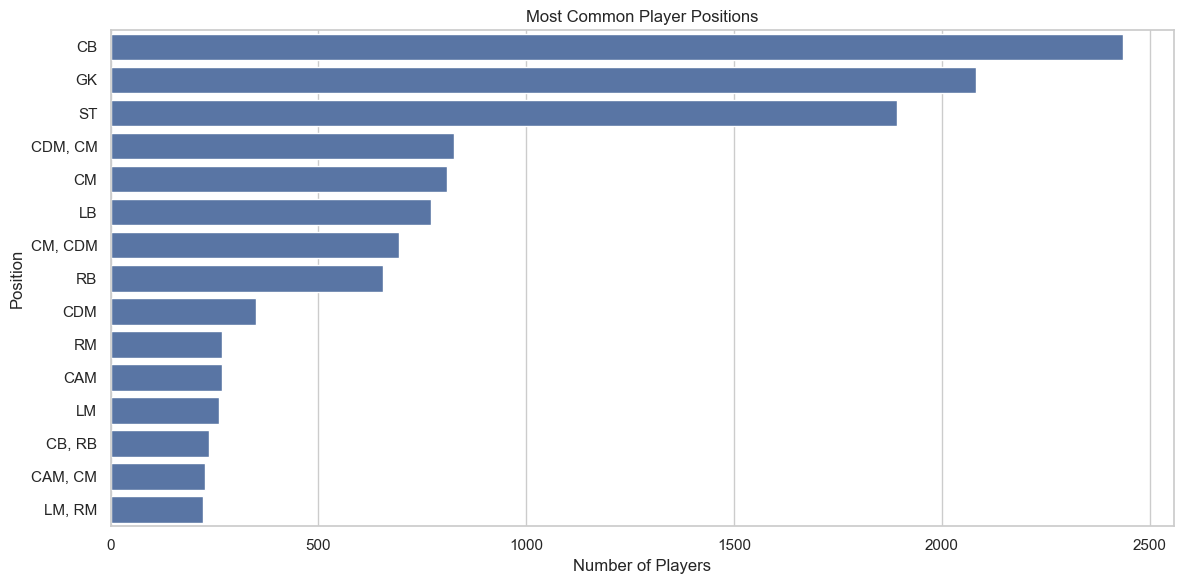

In [8]:
# Position Analysis
plt.figure(figsize=(12,6))
sns.countplot(y='player_positions', data=df, order=df['player_positions'].value_counts().head(15).index)
plt.title('Most Common Player Positions')
plt.xlabel('Number of Players')
plt.ylabel('Position')
plt.tight_layout()
plt.show()

In [9]:
# Top Players
print("\n--- Top 10 Players by Overall Rating ---")
print(df[['short_name', 'overall', 'value_eur', 'wage_eur']].sort_values(by='overall', ascending=False).head(10))


--- Top 10 Players by Overall Rating ---
           short_name  overall  value_eur  wage_eur
0            L. Messi       93   67500000    560000
1   Cristiano Ronaldo       92   46000000    220000
5        K. De Bruyne       91   87000000    370000
4           Neymar Jr       91   90000000    270000
3      R. Lewandowski       91   80000000    240000
2            J. Oblak       91   75000000    125000
11           M. Salah       90   78000000    250000
9             Alisson       90   62500000    160000
8         V. van Dijk       90   75500000    210000
10            S. Mané       90   78000000    250000


C:\Users\himan\AppData\Local\Temp\ipykernel_11648\2632659554.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_nations.values, y=top_nations.index, palette='muted')


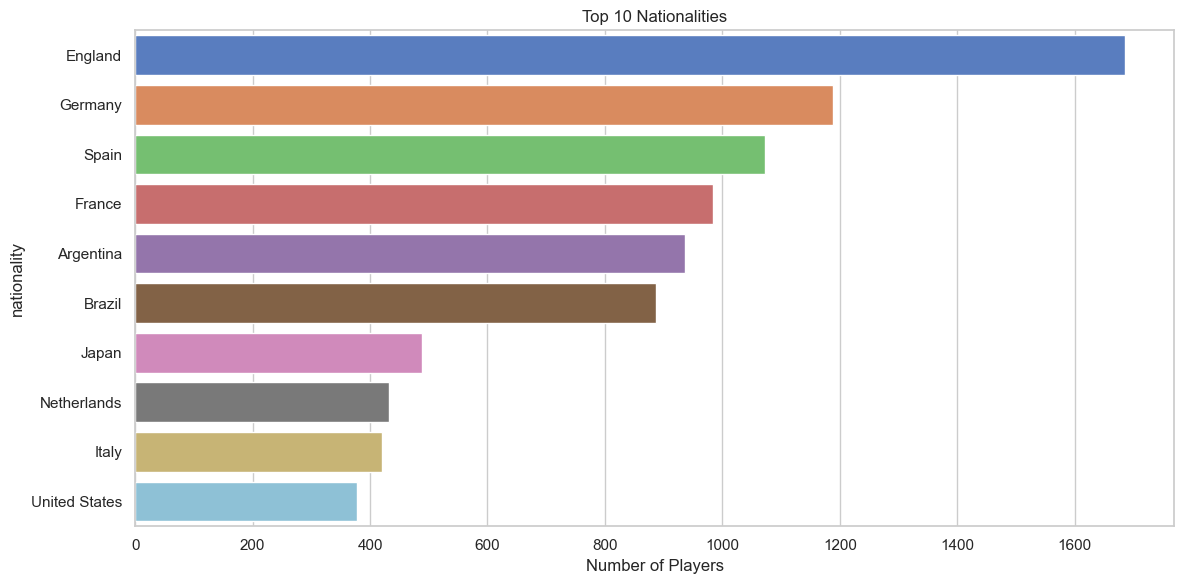

In [10]:
# Nationalities
plt.figure(figsize=(12,6))
top_nations = df['nationality'].value_counts().head(10)
sns.barplot(x=top_nations.values, y=top_nations.index, palette='muted')
plt.title('Top 10 Nationalities')
plt.xlabel('Number of Players')
plt.tight_layout()
plt.show()

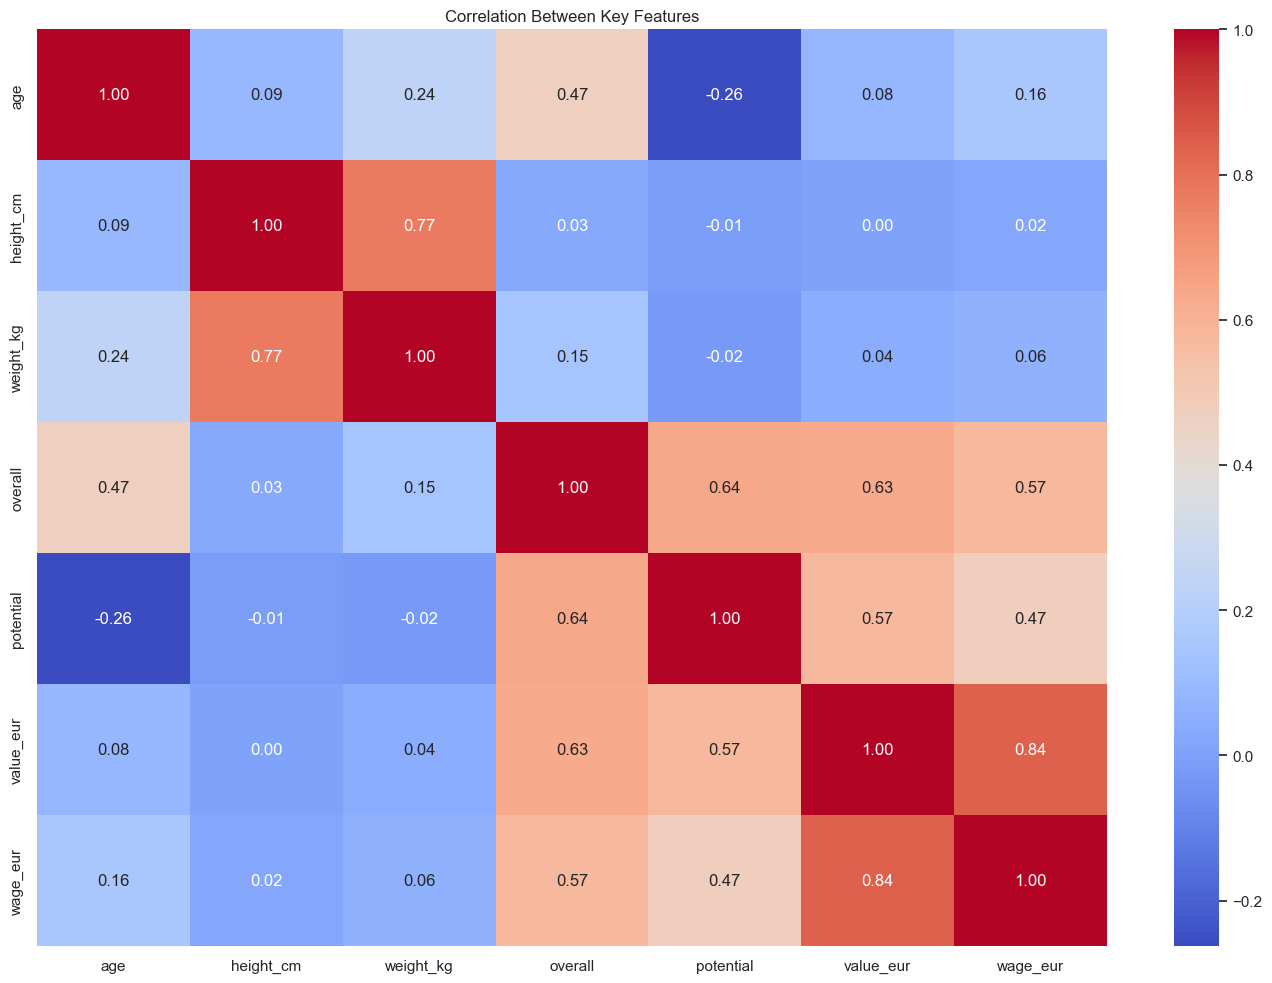

In [11]:
# Correlation Heatmap
plt.figure(figsize=(14,10))
corr = df[['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur', 'wage_eur']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Key Features')
plt.tight_layout()
plt.show()

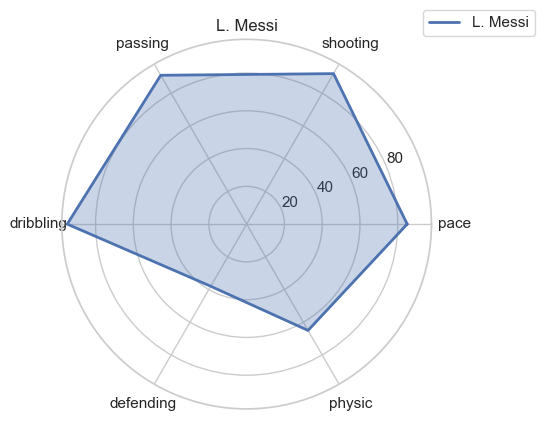

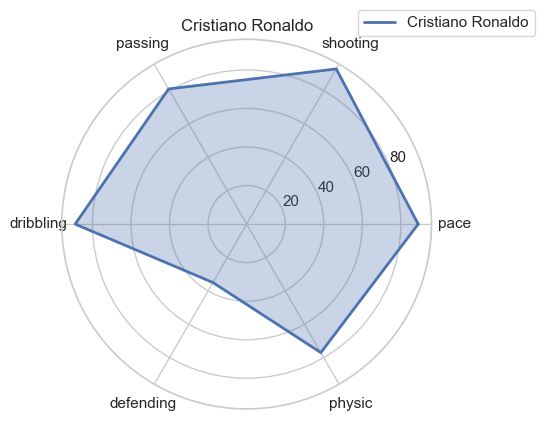

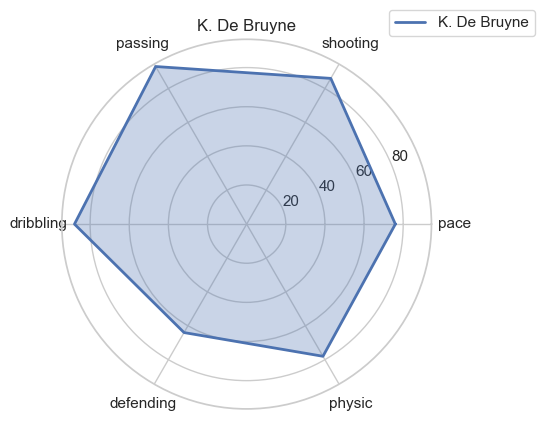

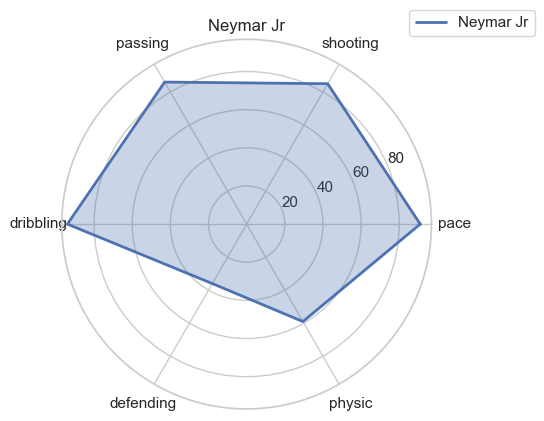

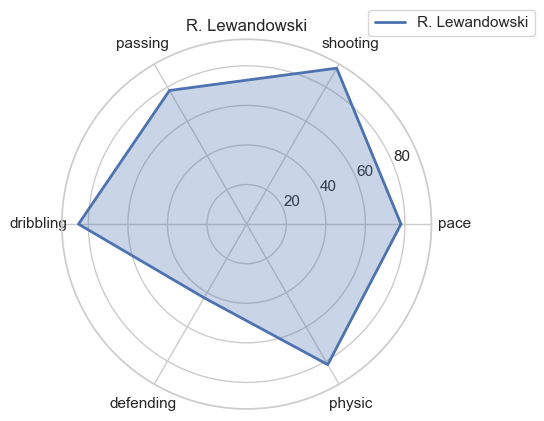

In [12]:
from math import pi
import matplotlib.pyplot as plt

# Select top 5 players by overall rating
top_players = df.sort_values(by='overall', ascending=False).head(5)
attributes = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

def create_radar(player_row):
    values = player_row[attributes].values.flatten().tolist()
    values += values[:1]
    angles = [n / float(len(attributes)) * 2 * pi for n in range(len(attributes))]
    angles += angles[:1]

    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], attributes)
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=player_row['short_name'])
    ax.fill(angles, values, alpha=0.3)
    plt.title(player_row['short_name'])
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.show()

# Plot radar charts
for idx, row in top_players.iterrows():
    create_radar(row)


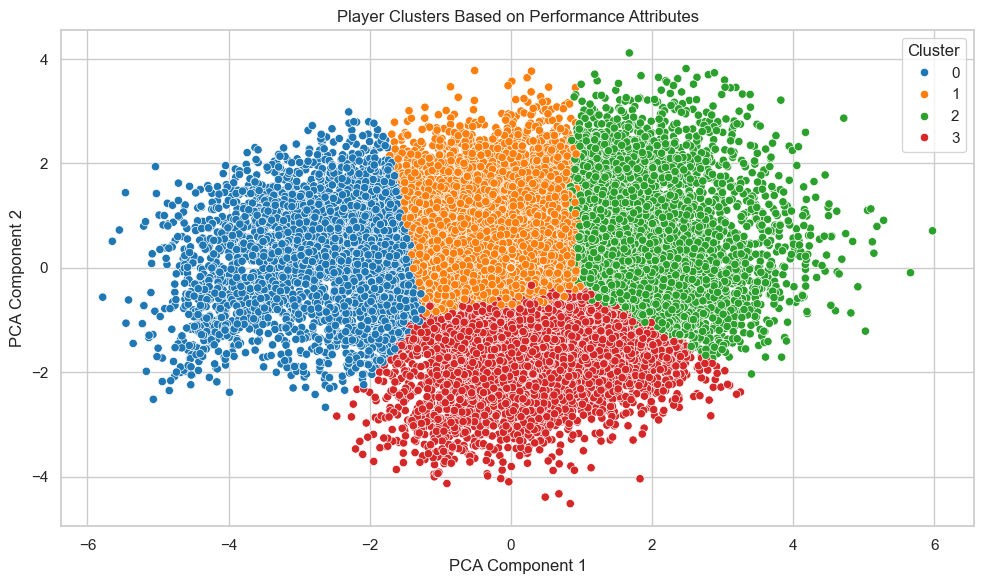

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Numeric attributes to cluster on
features = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
X = df[features].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df.loc[X.index, 'cluster'] = clusters

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette='tab10')
plt.title('Player Clusters Based on Performance Attributes')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()
